In [2]:
import numpy as np, pandas as pd, matplotlib.pyplot as plt, seaborn as sns 


,Redshift,Hubble parameter(km/s/Mpc),Error in Hubble Parameter(km/s/Mpc)
count,28.000000,28.000000,28.000000
mean,0.678429,106.978571,18.017857
std,0.558925,42.067559,13.356537
min,0.070000,68.600000,4.000000
25%,0.252500,76.825000,8.000000
50%,0.536500,91.000000,14.000000
75%,0.885000,119.000000,20.750000
max,2.300000,224.000000,62.000000


In [9]:

df = pd.read_csv('ctcdata.csv')
df.describe()

,Redshift,Hubble parameter(km/s/Mpc),Error in Hubble Parameter(km/s/Mpc)
count,28.000000,28.000000,28.000000
mean,0.678429,106.978571,18.017857
std,0.558925,42.067559,13.356537
min,0.070000,68.600000,4.000000
25%,0.252500,76.825000,8.000000
50%,0.536500,91.000000,14.000000
75%,0.885000,119.000000,20.750000
max,2.300000,224.000000,62.000000


In [10]:
df.head()

,Redshift,Hubble parameter(km/s/Mpc),Error in Hubble Parameter(km/s/Mpc)
0,0.070,69.0,19.6
1,0.100,69.0,12.0
2,0.120,68.6,26.2
3,0.170,83.0,8.0
4,0.179,75.0,4.0


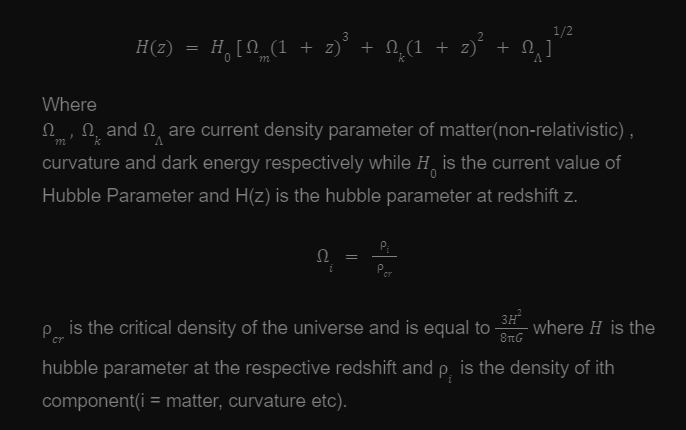

```H(z) = H0 [ Omega_m*(1 + z)**3 + k*(1 + z)**2 + Omega_A ]**0.5```  

H0 =  73.04 +/- 1.04 km s-1Mpc-1  
**Given a dataset for Hubble parameter at various redshifts, constrain and find the best fit values for Omega_m , Omega_k and plot 1 and 2D marginalized probability distributions for all three parameters and report uncertainty corresponding to 1,2 and 3**



In [11]:
h0 =  73.04; e0 = 1.04; h0u = h0 + e0; h0l = h0 - e0 

df.columns = ['z', 'hz', 'e']
df.head()

,z,hz,e
0,0.070,69.0,19.6
1,0.100,69.0,12.0
2,0.120,68.6,26.2
3,0.170,83.0,8.0
4,0.179,75.0,4.0


```Sqrt( H(z)/H0 ) = A*Omega_m + B*Omega_k + Omega_l```  
```Sqrt( H(z)/H0 ) = a*m + b*k + l```

In [16]:
df['a'] = (1+df['z'])**3
df['b'] = (1+df['z'])**2
df['hz-2'] = ((df['hz']-df['e'])/(h0+e0))**0.5
df['hz-1'] = ((df['hz']-df['e'])/(h0-e0))**0.5
df['hz0'] = ((df['hz']/h0))**0.5
df['hz1'] = ((df['hz']+df['e'])/(h0+e0))**0.5
df['hz2'] = ((df['hz']+df['e'])/(h0-e0))**0.5
df.head()

,z,hz,e,a,b,hz-2,hz-1,hz0,hz1,hz2
0,0.070,69.0,19.6,1.225043,1.144900,0.816607,0.828318,0.971951,1.093620,1.109304
1,0.100,69.0,12.0,1.331000,1.210000,0.877176,0.889757,0.971951,1.045664,1.060660
2,0.120,68.6,26.2,1.404928,1.254400,0.756541,0.767391,0.969129,1.131237,1.147461
3,0.170,83.0,8.0,1.601613,1.368900,1.006190,1.020621,1.066004,1.108333,1.124228
4,0.179,75.0,4.0,1.638858,1.390041,0.978991,0.993031,1.013328,1.032674,1.047484
